uni:zl3234 name: Ziran Liu

# MNIST Sign Language

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [39]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(.5))
        model.add(Flatten())
        model.add(Dense(64, activation = "relu"))
        model.add(Dense(25, activation = "softmax"))
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = .2, random_state = 10)
        x_train, x_test = x_train / 255, x_test / 255
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        y_train = to_categorical(y_train, num_classes = 25)
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
        y_test = to_categorical(y_test, num_classes = 25)
        self.data = {
            "train": (x_train, y_train), # (x_train, y_train)
            "test" : (x_test, y_test), # (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        
        history = self.model.fit(self.data["train"][0],self.data["train"][1], batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data = (self.data["test"][0], self.data["test"][1]))
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data = data / 255
        data = data.reshape(data.shape[0], 28, 28, 1)
        prediction = self.model.predict(data)
        prediction = np.argmax(prediction, axis=1)
        return prediction
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [40]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [41]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

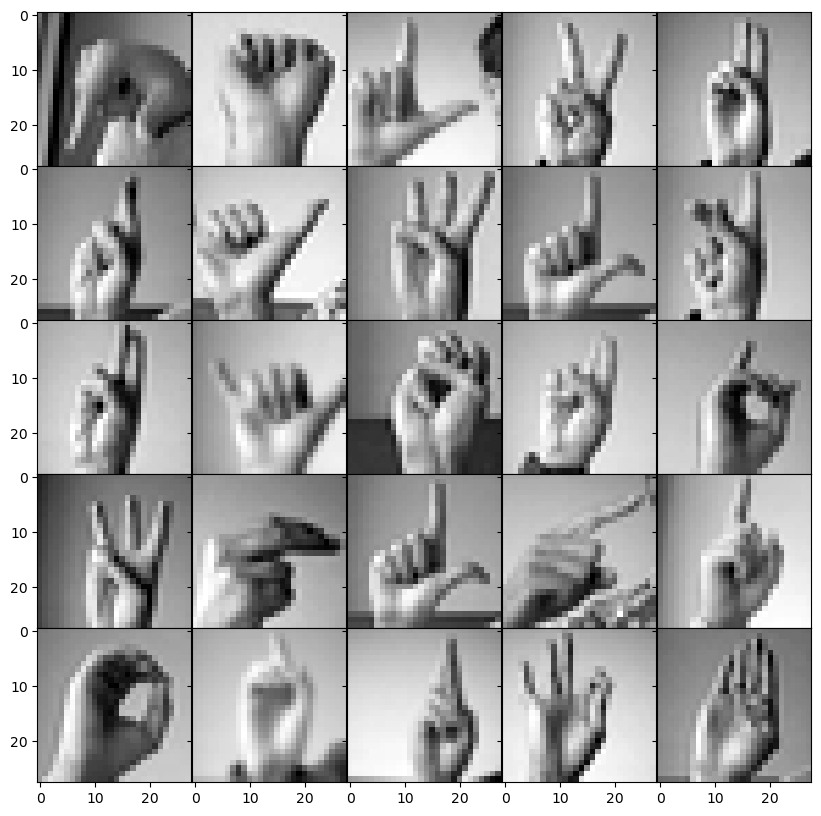

In [42]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 6s 31ms/step - loss: 2.0441 - accuracy: 0.4018 - val_loss: 0.8051 - val_accuracy: 0.7871
Epoch 2/30
172/172 [==============================] - 5s 29ms/step - loss: 0.6589 - accuracy: 0.7908 - val_loss: 0.3363 - val_accuracy: 0.9106
Epoch 3/30
172/172 [==============================] - 5s 29ms/step - loss: 0.3522 - accuracy: 0.8878 - val_loss: 0.1646 - val_accuracy: 0.9709
Epoch 4/30
172/172 [==============================] - 5s 30ms/step - loss: 0.2161 - accuracy: 0.9317 - val_loss: 0.0795 - val_accuracy: 0.9909
Epoch 5/30
172/172 [==============================] - 6s 32ms/step - loss: 0.1401 - accuracy: 0.9583 - val_loss: 0.0440 - val_accuracy: 0.9971
Epoch 6/30
172/172 [==============================] - 6s 35ms/step - loss: 0.1008 - accuracy: 0.9715 - val_loss: 0.0271 - val_accuracy: 0.9969
Epoch 7/30
172/172 [==============================] - 5s 31ms/step - loss: 0.0756 - accuracy: 0.9790 - val_loss: 0.0142 - val_accuracy: 0.9998

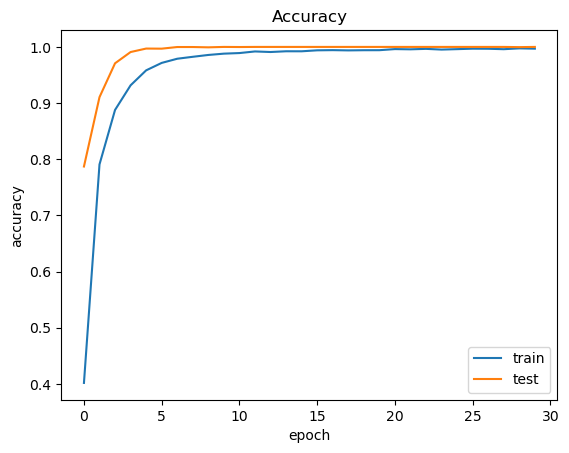

In [43]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [44]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 3ms/step
0.9252649191299498
